## Fase 5: Análisis de datos


In [9]:
# imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
from IPython.display import display
import time

from funciones_scraping import get_languages

pd.options.display.max_columns = None

In [2]:
# Cargamos el dataframe

df = pd.read_csv('../output/dataframe-limpio3939x55.csv', index_col=0)
df.shape

(3939, 55)

In [3]:
df.head()

,allies,bf (beta),c,c#,c++,clojure,coffeescript,collections,comments,crystal,dart,elixir,elm (beta),erlang (beta),f#,followers,following,fortran (beta),go,groovy (beta),haskell,honor,java,javascript,julia (beta),kotlin (beta),kumite,last seen,leaderboard position,lua (beta),member since,nasm (beta),nim (beta),objective-c (beta),ocaml (beta),php,powershell (beta),purescript (beta),python,r (beta),rank,ruby,rust,scala (beta),shell,solidity (beta),sql,swift,total completed kata,total languages trained,translations,typescript,username,github,linkedin
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,376.0,0.0,428.0,0.0,0.0,0.0,2017-02-01,0.0,0.0,2015-12-01,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,2.0,0.0,0.0,mr.tk,NaN,NaN
1,47.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,2017-05-01,0.0,0.0,2016-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,Caffeinatedbrew,https://github.com/Caffeinatedbrew,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,0.0,2089.0,0.0,5071.0,0.0,0.0,0.0,2018-08-01,0.0,0.0,2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1.0,0.0,0.0,rscharfer,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7051.0,0.0,21.0,0.0,0.0,8.0,2018-12-01,318.0,0.0,2018-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20110.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,2.0,0.0,0.0,tommur,NaN,NaN
4,770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,770.0,0.0,0.0,0.0,0.0,2265.0,2.0,2801.0,0.0,0.0,1.0,2018-12-01,0.0,0.0,2017-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1646.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,3.0,0.0,0.0,caparezza,https://github.com/jakubpodolski,NaN


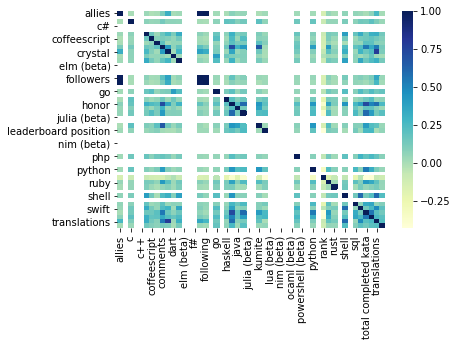

In [4]:
correlation = df.corr(method='pearson')
ax = sns.heatmap(correlation, cmap="YlGnBu")

In [5]:
# Se puede apreciar la alta correlación entre las features sociales: 
# followers, following, allies

correlation.loc['followers', 'allies'], correlation.loc['following', 'allies']

(0.988244815568993, 0.9994052006049392)

In [6]:
# Podemos eliminar dos de las tres por la alta correlación. 
df.drop(columns=['followers', 'following'], inplace=True)

In [ ]:
correlation = df.corr(method='pearson')
ax = sns.heatmap(correlation, cmap="YlGnBu")

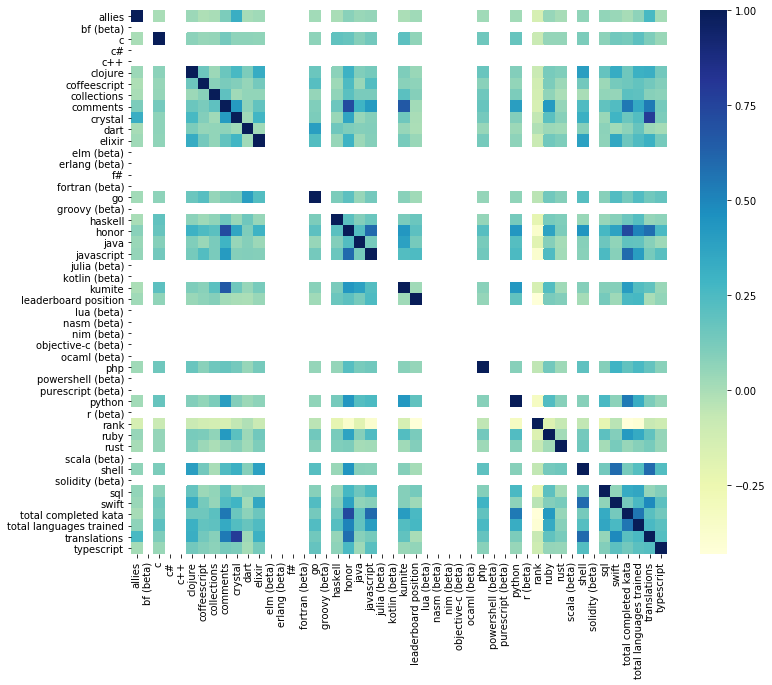

In [12]:
fig, ax = plt.subplots(figsize=(12,10)) 
ax = sns.heatmap(correlation, cmap="YlGnBu")

In [13]:
df['fortran (beta)'].value_counts()

0.0    3939
Name: fortran (beta), dtype: int64